In [1]:
import requests
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import statsmodels.api as sm
from patsy.builtins import *

In [41]:
Cleaned_Venues = pd.read_csv('../API_Data/cleaned_venues.csv')
Regression_DF = Cleaned_Venues[['Venue Name', 'Average Rating', 'Review Count', 'Latitude', 'Longitude', 'Distance', 'Source']]
Regression_DF = Regression_DF[Regression_DF['Source'] == 'Yelp']

<Axes: xlabel='Average Rating', ylabel='Distance'>

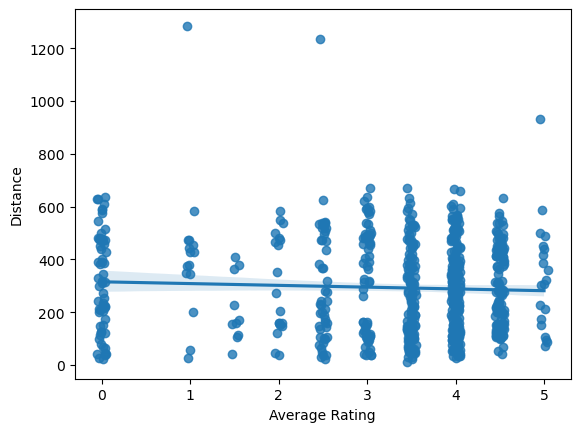

In [42]:
sns.regplot(x = 'Average Rating', y = 'Distance', data = Regression_DF, x_jitter = 0.05)

In [47]:
x = Regression_DF['Distance']

y = Regression_DF['Review Count']

x = sm.add_constant(x)

lin_reg = sm.OLS(y,x)

model = lin_reg.fit()

print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Review Count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.593
Date:                Thu, 13 Jul 2023   Prob (F-statistic):              0.207
Time:                        13:08:29   Log-Likelihood:                -4653.5
No. Observations:                 682   AIC:                             9311.
Df Residuals:                     680   BIC:                             9320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.8429     16.323      7.464      0.0